## Compare Network Architectures: HardDeepFakes

In [1]:
from fastai.core import *
from fastai.vision import *

In [2]:
path = Path('../data/HardDeepFakes')
src = ImageList.from_folder(path).split_by_folder(train='train', valid='val')

In [3]:
def get_data(bs,size):
    data = (src.label_from_re('([A-Z]+).png$')
           .transform(get_transforms(max_warp=0, max_zoom=0), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

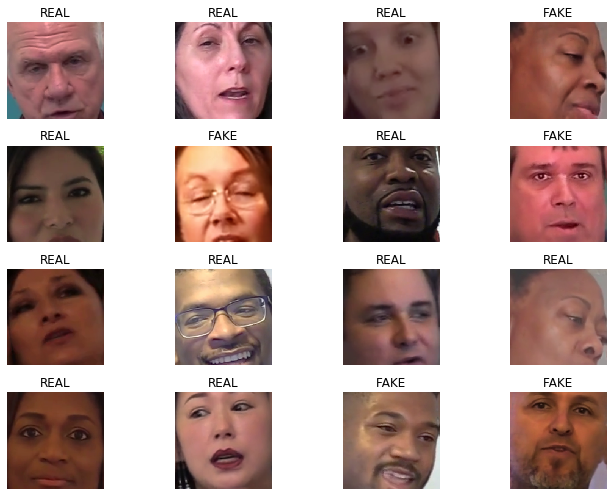

In [4]:
bs, sz = 32, 256
data = get_data(bs, sz)
data.show_batch(rows=4, figsize=(10,7))

# ResNet

In [8]:
def run_resnet(model):
    learner = cnn_learner(data, model, metrics=[accuracy])
    learner.lr_find()
    learner.recorder.plot()
    
    # Train only the head of the network
    learner.fit_one_cycle(5, 1e-3)
    # Unfreeze other layers and train the entire network
    learner.unfreeze()
    learner.fit_one_cycle(20, max_lr=slice(1e-5, 1e-3))
    
    # Post-Training Review
    learner.recorder.plot_losses()
    
    interp = ClassificationInterpretation.from_learner(learner)
    interp.plot_confusion_matrix()
    
    interp.plot_top_losses(9, figsize=(10,10))
    
    

### ResNet18

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.105814,0.878683,0.587500,00:04
1,0.915936,0.757548,0.647500,00:04
2,0.804353,0.786285,0.660000,00:04
3,0.658790,0.721373,0.665000,00:04
4,0.575258,0.706954,0.690000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.542794,0.716348,0.662500,00:05
1,0.516185,0.658180,0.710000,00:05
2,0.468396,0.693566,0.675000,00:05
3,0.413211,0.773873,0.680000,00:05
4,0.313659,0.873697,0.712500,00:05
5,0.254747,1.042495,0.672500,00:05
6,0.198239,1.047555,0.695000,00:05
7,0.155305,0.946042,0.722500,00:05
8,0.126768,0.985368,0.722500,00:05
9,0.107147,1.273677,0.710000,00:05


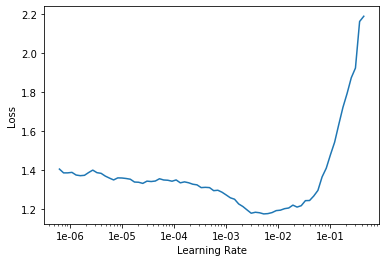

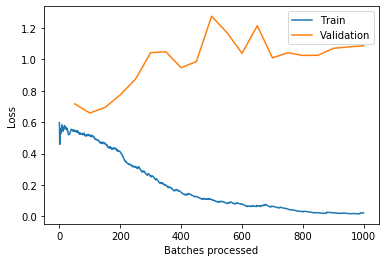

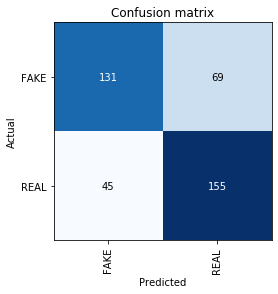

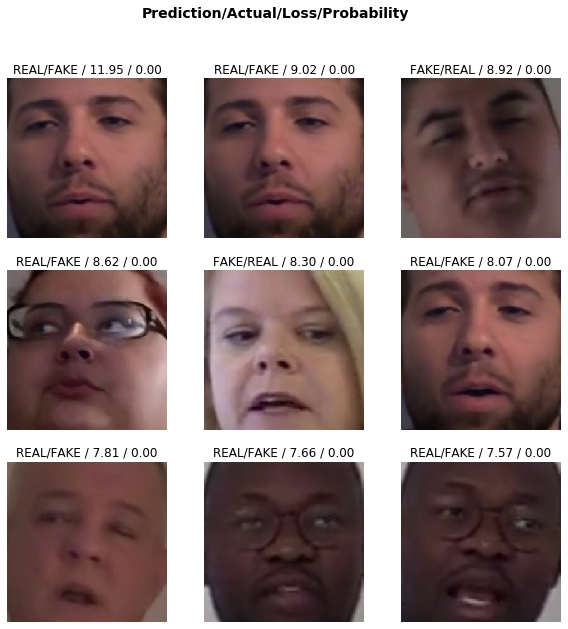

In [9]:
from fastai.vision.models import resnet18
run_resnet(resnet18)

`resnet18` has a final accuracy of **71.5%** and a peak accuracy of **72.5%**

### ResNet34

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.196651,1.042738,0.587500,00:05
1,0.992365,1.099567,0.597500,00:05
2,0.819860,1.007590,0.635000,00:05
3,0.641655,1.005501,0.630000,00:05
4,0.581797,1.002272,0.627500,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.576242,0.948874,0.650000,00:07
1,0.498086,0.867326,0.655000,00:07
2,0.408243,0.937116,0.675000,00:07
3,0.351354,1.103638,0.652500,00:07
4,0.284823,1.041314,0.672500,00:07
5,0.264343,1.310838,0.662500,00:07
6,0.200186,1.100292,0.695000,00:08
7,0.163105,0.970013,0.720000,00:07
8,0.119664,1.121197,0.672500,00:07
9,0.085584,0.981066,0.687500,00:07


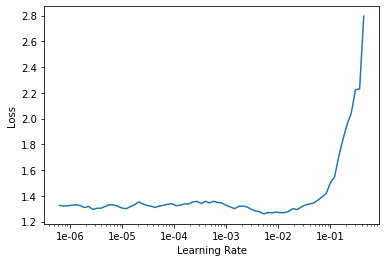

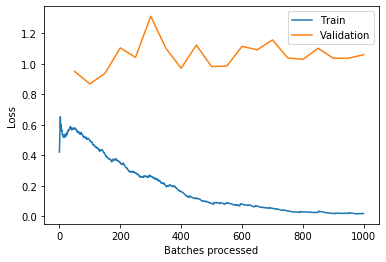

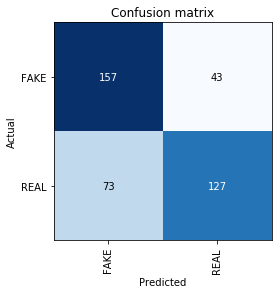

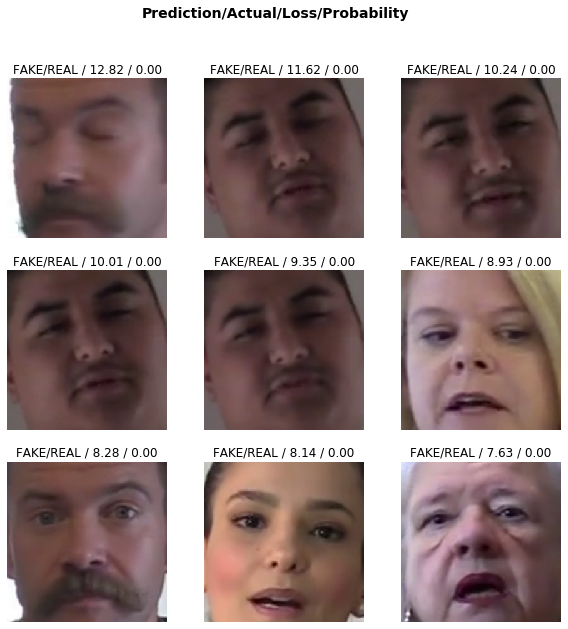

In [10]:
from fastai.vision.models import resnet34
run_resnet(resnet34)

`resnet34` has a final accuracy of **71.0%** and a peak accuracy of **72.0%**

### ResNet50

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.075784,1.158631,0.617500,00:10
1,0.948444,1.271795,0.622500,00:10
2,0.721598,0.945037,0.675000,00:09
3,0.536788,0.884448,0.677500,00:10
4,0.444304,0.843478,0.695000,00:10


epoch,train_loss,valid_loss,accuracy,time
0,0.365744,0.860067,0.687500,00:13
1,0.344887,0.996062,0.657500,00:12
2,0.315085,1.020176,0.657500,00:12
3,0.271643,1.237164,0.660000,00:12
4,0.274302,1.200388,0.695000,00:12
5,0.228930,1.662874,0.685000,00:12
6,0.160352,1.167334,0.677500,00:12
7,0.110986,1.124975,0.720000,00:12
8,0.124530,1.533176,0.647500,00:12
9,0.108297,0.982166,0.722500,00:12


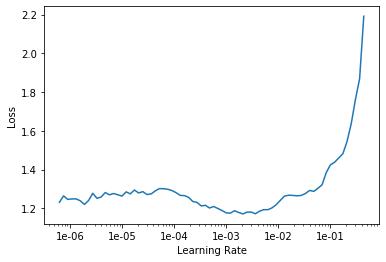

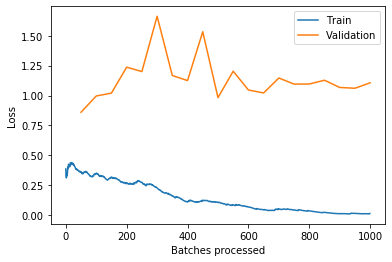

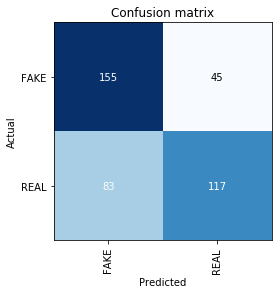

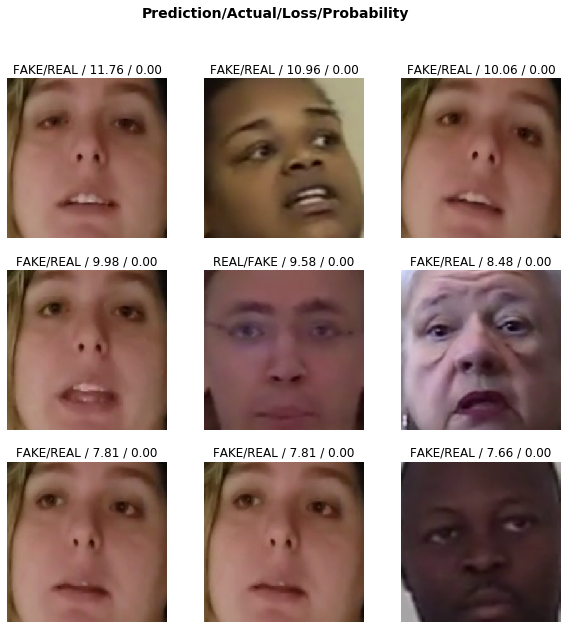

In [11]:
from fastai.vision.models import resnet50
run_resnet(resnet50)

`resnet50` has a final accuracy of **68.0%** and a peak accuracy of **73.8%**.

# EfficientNet

In [14]:
# !pip install efficientnet-pytorch
from efficientnet_pytorch import EfficientNet

In [22]:
def run_efficientnet(model):
    learner = Learner(data, model, metrics=[accuracy])

    learner.lr_find()
    learner.recorder.plot()
    
    # Train only the head of the network
    learner.fit_one_cycle(5, 1e-3)
    # Unfreeze other layers and train the entire network
    learner.unfreeze()

    #NOTE: Not using discriminitive learning rates!
    learner.fit_one_cycle(20, max_lr=1e-4)
    
    # Post-Training Review
    learner.recorder.plot_losses()
    
    interp = ClassificationInterpretation.from_learner(learner)
    interp.plot_confusion_matrix()
    
    interp.plot_top_losses(9, figsize=(10,10))   
    

### EfficientNetB0

Loaded pretrained weights for efficientnet-b0


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.587223,1.105731,0.500000,00:12
1,0.419389,2.623519,0.520000,00:12
2,0.293821,1.309796,0.647500,00:12
3,0.181465,1.493261,0.660000,00:12
4,0.109989,1.149378,0.650000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.069194,1.026738,0.647500,00:12
1,0.057903,0.879056,0.672500,00:13
2,0.051392,0.944550,0.700000,00:13
3,0.058254,0.846277,0.752500,00:13
4,0.045681,1.043886,0.727500,00:13
5,0.040357,0.954060,0.717500,00:13
6,0.033215,1.084362,0.710000,00:13
7,0.041029,0.981235,0.740000,00:13
8,0.030774,1.178770,0.745000,00:13
9,0.030408,0.927303,0.762500,00:13


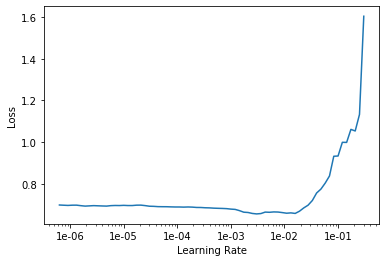

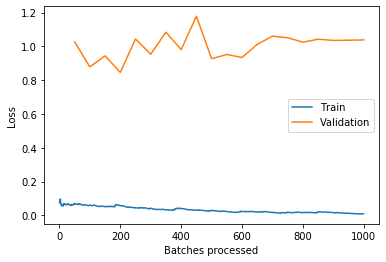

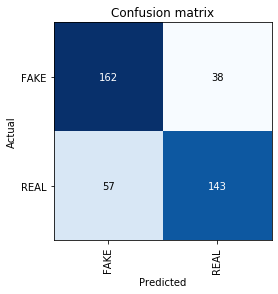

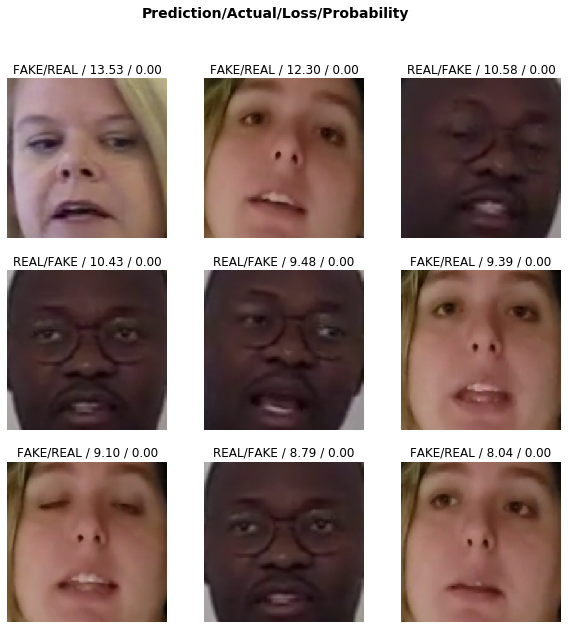

In [23]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=data.c)
run_efficientnet(model)

`efficientnetb0` has a final accuracy of **76.3%** and a peak accuracy of **77.8%**

### EfficientNetB1

Loaded pretrained weights for efficientnet-b1


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.597099,0.990834,0.550000,00:18
1,0.464123,4.770303,0.525000,00:18
2,0.299971,1.881104,0.642500,00:17
3,0.183807,1.288120,0.687500,00:18
4,0.104221,1.090974,0.690000,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.058103,1.036661,0.705000,00:17
1,0.057147,1.005361,0.715000,00:17
2,0.056433,0.915630,0.717500,00:18
3,0.048857,1.072931,0.712500,00:17
4,0.045116,1.172901,0.665000,00:17
5,0.038426,1.101867,0.720000,00:17
6,0.032344,1.139252,0.712500,00:17
7,0.031872,1.323448,0.695000,00:17
8,0.024206,1.245423,0.707500,00:17
9,0.019533,1.293198,0.707500,00:17


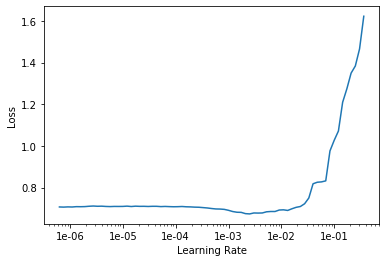

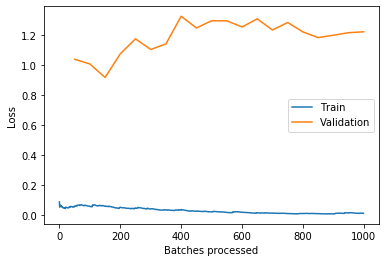

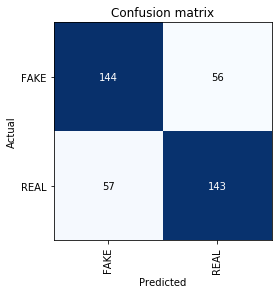

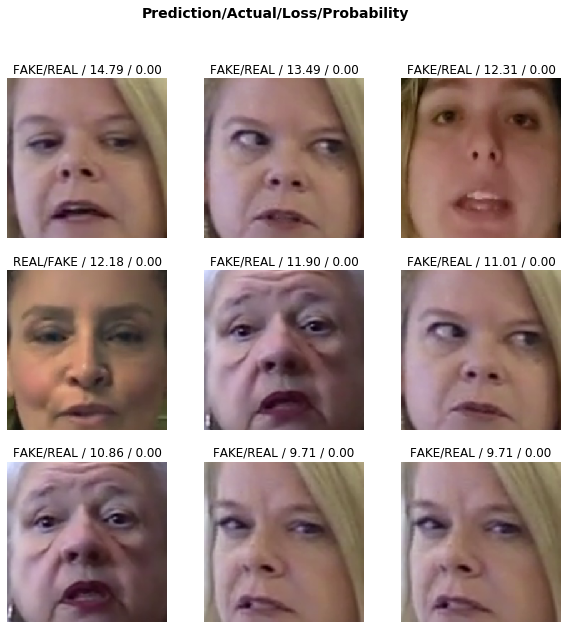

In [24]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes=data.c)
run_efficientnet(model)

`efficientnetb1` has a final accuracy of **71.8%** and a peak accuracy of **72.8%**

### EfficientNetB2

Loaded pretrained weights for efficientnet-b2


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.595757,0.809453,0.537500,00:19
1,0.426771,3.578227,0.580000,00:18
2,0.311035,1.473232,0.592500,00:18
3,0.189684,1.840981,0.625000,00:18
4,0.108757,0.977744,0.715000,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.055222,0.787147,0.737500,00:18
1,0.056714,0.727890,0.767500,00:18
2,0.046019,0.690565,0.782500,00:18
3,0.037791,0.745280,0.770000,00:18
4,0.047040,0.752701,0.777500,00:18
5,0.028970,0.866828,0.772500,00:18
6,0.035215,0.839015,0.757500,00:18
7,0.026628,0.973236,0.757500,00:18
8,0.019888,0.990508,0.767500,00:18
9,0.017396,0.975415,0.752500,00:18


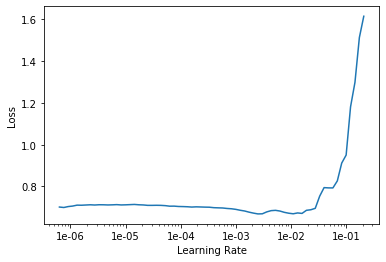

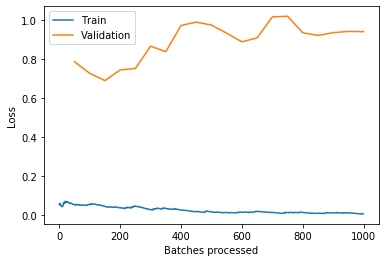

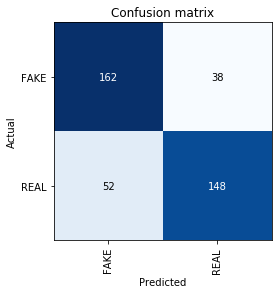

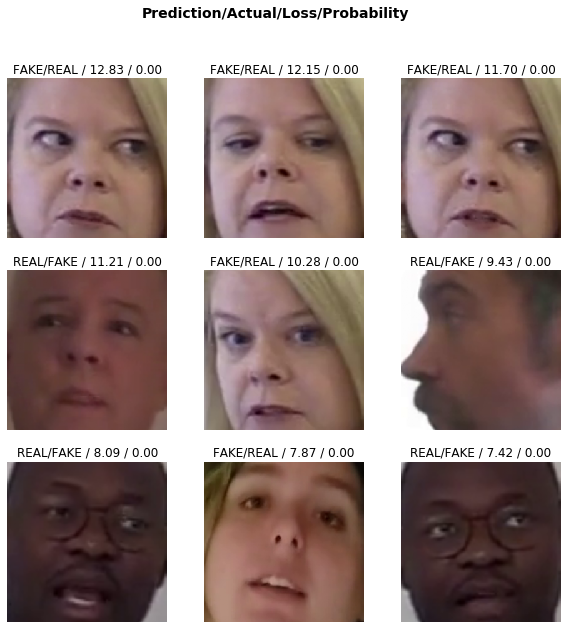

In [25]:
model = EfficientNet.from_pretrained('efficientnet-b2', num_classes=data.c)
run_efficientnet(model)

`efficientnetb2` has a final accuracy of **76.0%** and a peak accuracy of **76.0%**

## Conclusions

ResNets don't seem to improve. Might need more epochs? Overfitting?



|Network         | Pretrained     | Discriminitive | Final Accuracy % | Peak Accuracy %| Time for 1 Epoch (s) |
|----------------|----------------|----------------|------------------|----------------|----------------------|
|`resnet18`      |   True         |   True         | 71.5             | 72.5           | 5                    |
|`resnet34`      |   True         |   True         | 71.0             | 72.0           | 7                    |
|`resnet50`      |   True         |   True         | 68.0             | 73.8           | 12                   |
|`efficientnetb0`|   True         |   False        | 76.3             | 77.8           | 13                   |
|`efficientnetb1`|   True         |   False        | 71.8             | 72.8           | 17.5                 |
|`efficientnetb2`|   True         |   False        | **77.5**         | **78.3**       | 18                   |